## **Machine Learning Project: Predicting Engagement on Instagram Posts**
####*Group 30*

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
#load dataset
df = pd.read_csv('dataset.csv')
# df = df.iloc[:700]
print(df.head())

        alias                      username  \
0  1misssmeis  Sylvie Meis Official Account   
1  1misssmeis  Sylvie Meis Official Account   
2  1misssmeis  Sylvie Meis Official Account   
3      3ala2o                  Alaa Ebrahim   
4      3ala2o                  Alaa Ebrahim   

                                  descriptionProfile  \
0  ["TV Host Let's Dance for RTL Germany / SBS6 /...   
1  ["TV Host Let's Dance for RTL Germany / SBS6 /...   
2  ["TV Host Let's Dance for RTL Germany / SBS6 /...   
3  ['Youtuber/Gamer/Vlogger/Business owner . Snap...   
4  ['Youtuber/Gamer/Vlogger/Business owner . Snap...   

                               website  numberPosts  numberFollowers  \
0                    www.sylviemeis.de          988           720979   
1                    www.sylviemeis.de          988           720979   
2                    www.sylviemeis.de          988           720979   
3  www.youtube.com/watch?v=MXkqzeIlhSQ          938           792886   
4  www.youtube.com/w

In [ ]:
df.columns

Index(['alias', 'username', 'descriptionProfile', 'website', 'numberPosts',
       'numberFollowers', 'numberFollowing', 'private', 'isVideo',
       'multipleImage', 'tags', 'mentions', 'description', 'localization',
       'date', 'numberLikes', 'filename', 'avgPrevious10Likes',
       'stdPrevious10Likes', 'avgPrevious3Likes', 'stdPrevious3Likes',
       'avgPostsWeekly'],
      dtype='object')

#### **Preprocessing**

In [ ]:
df["private"] = df["private"].astype(int)
df["isVideo"] = df["isVideo"].astype(int)
df["multipleImage"] = df["multipleImage"].astype(int)
df

,alias,username,descriptionProfile,website,numberPosts,numberFollowers,numberFollowing,private,isVideo,multipleImage,...,description,localization,date,numberLikes,filename,avgPrevious10Likes,stdPrevious10Likes,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly
0,1misssmeis,Sylvie Meis Official Account,"[""TV Host Let's Dance for RTL Germany / SBS6 /...",www.sylviemeis.de,988,720979,233,0,0,0,...,Calm before the 'glam' storm! 💋💄💅🏻💆🏼💇🏼Tomorrow...,NaN,2017-04-27T05:00:00.000Z,11227,18096206_126240614590026_6106733145975947264_n...,19881.545455,8586.574056,13742.00,5156.535691,5.526025
1,1misssmeis,Sylvie Meis Official Account,"[""TV Host Let's Dance for RTL Germany / SBS6 /...",www.sylviemeis.de,988,720979,233,0,0,0,...,With my lovely colleague @fraukeludowig_offici...,NaN,2017-04-29T05:00:00.000Z,10047,18161288_472089323136061_5128727096486526976_n...,17773.272727,7503.863008,12386.75,5161.117838,5.666397
2,1misssmeis,Sylvie Meis Official Account,"[""TV Host Let's Dance for RTL Germany / SBS6 /...",www.sylviemeis.de,988,720979,233,0,0,0,...,"My look last night, hosting Let's Dance! Style...",NaN,2017-04-29T05:00:00.000Z,16781,18161312_678529115665252_1780327406628765696_n...,19516.090909,9014.520102,13455.00,5818.683958,5.333079
3,3ala2o,Alaa Ebrahim,['Youtuber/Gamer/Vlogger/Business owner . Snap...,www.youtube.com/watch?v=MXkqzeIlhSQ,938,792886,466,0,0,0,...,👌👌,NaN,2017-04-18T05:00:00.000Z,9132,18011549_494145874042829_5968002476794707968_n...,8919.545455,3214.840665,5660.75,3003.871557,2.233995
4,3ala2o,Alaa Ebrahim,['Youtuber/Gamer/Vlogger/Business owner . Snap...,www.youtube.com/watch?v=MXkqzeIlhSQ,938,792886,466,0,0,0,...,.\r\n.\r\nقبل فتره استلمت لابتوب #LegionY520 م...,NaN,2017-04-24T05:00:00.000Z,6000,18013785_1299726350135511_3450110605690667008_...,9201.545455,2948.003884,5195.75,1941.644750,2.113168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,nadiadamaso_ebnl,"Ｎａｄｉａ Ｄａｍａｓｏ, 2 1","['nadia@eatbetternotless.com ✉️ Cookbook ""Eat ...",www.eatbetternotless.com,1041,171865,868,0,0,0,...,Ha Long Bay!🌊 -last one I promise!🙈 But I didn...,NaN,2017-04-29T05:00:00.000Z,3258,18251342_445181425818798_1864907866876411904_n...,2751.272727,749.727091,2642.25,1080.034722,5.894427
1576,nadia_mejia,Nadia Grace,['GIVE LOVE. BREATHE LOVE. BE LOVE // NewMark/...,m.youtube.com/watch?v=QfwjAFLm4wA,1481,227691,402,0,0,0,...,Spent the weekend exploring this crazy city //...,"San Francisco, California",2017-04-30T05:00:00.000Z,4151,18160713_407215732998589_8968161987750002688_n...,6430.090909,3248.541226,3297.50,1938.017630,9.153142
1577,nadia_mejia,Nadia Grace,['GIVE LOVE. BREATHE LOVE. BE LOVE // NewMark/...,m.youtube.com/watch?v=QfwjAFLm4wA,1481,227691,402,0,0,0,...,Weekend getaway 🍹🌹,Pacific Cocktail Haven,2017-04-29T05:00:00.000Z,2187,18162218_680872582084913_2127254167352246272_n...,7124.272727,2679.747876,5486.50,2413.491316,8.749271
1578,nadia_mejia,Nadia Grace,['GIVE LOVE. BREATHE LOVE. BE LOVE // NewMark/...,m.youtube.com/watch?v=QfwjAFLm4wA,1481,227691,402,0,0,0,...,My week was filled w/ so many memorable highli...,NaN,2017-04-30T05:00:00.000Z,5195,18251482_1303746693044075_8322873452520275968_...,6742.181818,3209.172382,3508.50,2160.358998,8.614722


In [ ]:
import cv2
import numpy as np
import scipy
# from scipy.misc import imread
# import cPickle as pickle
import random
import os
import matplotlib.pyplot as plt

# Feature extractor
def extract_features(image_path, vector_size=50):
    image = cv2.imread(image_path)
    # plt.imshow(img)
    # plt.show()
    try:
        alg = cv2.KAZE_create()
        # Finding image keypoints
        kps = alg.detect(image)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        a=[]
        if dsc is None:
          return a
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print('Error: ', e)
        return None

    return dsc

In [ ]:
pip install numpy opencv-python==3.4.2.17 opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 45.3 MB/s 
     |████████████████████████████████| 30.6 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
features=[]
df_good=df.copy(deep=True)
for i in range(len(df)):
  image_name=df.iloc[i]['filename']
  print(i)
  feature=extract_features(image_name,40)
  if len(feature)==0:
    df_good=df_good.drop(i,axis=0)
  else:
    features.append(feature)

features


0
1
2
3


KeyboardInterrupt: ignored

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
features=np.array(features)
features
# features_red=pca.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


array([array([2., 3., 0., ..., 0., 0., 0.], dtype=float32),
       array([95., 11.,  5., ...,  0., 17., 50.], dtype=float32),
       array([0., 0., 0., ..., 0., 0., 1.], dtype=float32),
       array([21.,  1.,  1., ...,  0.,  0.,  1.], dtype=float32),
       array([6., 0., 1., ..., 0., 0., 0.], dtype=float32),
       array([28.,  6.,  1., ..., 12.,  7., 16.], dtype=float32),
       array([41.,  3.,  1., ...,  0.,  0.,  1.], dtype=float32),
       array([ 0.,  0., 13., ...,  0.,  0.,  2.], dtype=float32),
       array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
       array([91.,  2.,  0., ...,  0.,  0.,  0.], dtype=float32),
       array([32.,  7.,  3., ...,  2.,  0.,  0.], dtype=float32),
       array([12.,  3.,  2., ...,  0.,  0.,  0.], dtype=float32),
       array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
       array([4., 1., 4., ..., 0., 0., 0.], dtype=float32),
       array([21.,  2., 22., ...,  0.,  0.,  0.], dtype=float32),
       array([ 4., 16., 16., ...,  7., 12.,  0

In [ ]:
df_good['Img_features']=features
# df['Img_features']= pd.DataFrame(df['Img_features'].to_list())

In [ ]:
df2 = pd.DataFrame(df_good['Img_features'].to_list())
df3=pd.concat([df_good, df2], axis=1)
df3=df3.drop(['Img_features'], axis=1)

In [ ]:
df4 = df3.dropna()

In [ ]:
df4

,alias,username,descriptionProfile,website,numberPosts,numberFollowers,numberFollowing,private,isVideo,multipleImage,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
22,adenorah,Adenorah,['Anne-Laure Mais - Paris 🇫🇷 ✉️ email : adenor...,www.adenorah.com,1963.0,266992.0,716.0,False,False,False,...,0.201572,0.106376,-0.056514,-0.084368,0.061723,0.092053,-0.025490,-0.019429,0.190667,0.038089
23,adenorah,Adenorah,['Anne-Laure Mais - Paris 🇫🇷 ✉️ email : adenor...,www.adenorah.com,1963.0,266992.0,716.0,False,False,False,...,0.015633,0.013011,-0.004858,-0.001430,0.012005,0.011282,0.001806,-0.041268,0.025154,0.052967
27,adingattamimi_photography,Ading Attamimi,['Australia & Indonesia | Traveller | Now📍Prag...,www.adingattamimi.com,1747.0,153359.0,327.0,False,False,False,...,0.007601,0.026101,-0.003334,0.013878,0.007736,0.023399,0.000780,0.012919,0.005768,0.022252
28,adingattamimi_photography,Ading Attamimi,['Australia & Indonesia | Traveller | Now📍Prag...,www.adingattamimi.com,1747.0,153359.0,327.0,False,False,False,...,0.105212,0.075463,-0.090046,-0.035533,0.161094,0.158924,-0.037769,-0.016627,0.071189,0.080410
29,adingattamimi_photography,Ading Attamimi,['Australia & Indonesia | Traveller | Now📍Prag...,www.adingattamimi.com,1747.0,153359.0,327.0,False,False,False,...,0.082631,0.058003,-0.076940,-0.103589,0.224091,0.112511,-0.038634,-0.014887,0.159842,0.084054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,myspacetom,Tom Anderson,['Former first friend MySpace. Retired 🤓😁 Peop...,www.myspacetom.com,780.0,273396.0,522.0,False,False,False,...,0.099454,0.201458,0.053179,0.036218,0.081685,0.071027,0.008534,0.004958,0.009739,0.006849
1571,myspacetom,Tom Anderson,['Former first friend MySpace. Retired 🤓😁 Peop...,www.myspacetom.com,780.0,273396.0,522.0,False,False,False,...,0.043487,0.157548,-0.017170,-0.096768,0.029321,0.109555,-0.004951,-0.040455,0.013494,0.058120
1572,myspacetom,Tom Anderson,['Former first friend MySpace. Retired 🤓😁 Peop...,www.myspacetom.com,780.0,273396.0,522.0,False,False,False,...,0.006515,0.007122,-0.005133,0.005171,0.005134,0.005331,-0.003140,0.002809,0.003140,0.002809
1573,nadiadamaso_ebnl,"Ｎａｄｉａ Ｄａｍａｓｏ, 2 1","['nadia@eatbetternotless.com ✉️ Cookbook ""Eat ...",www.eatbetternotless.com,1041.0,171865.0,868.0,False,False,False,...,0.040064,0.023651,-0.008231,-0.007675,0.035770,0.013486,0.001113,-0.000422,0.018530,0.005766


In [ ]:
from google.colab import files

df4.to_csv('FinalFeatures1600.csv') 
files.download('FinalFeatures1600.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=df[['filename','numberFollowers','numberPosts','numberFollowing','numberLikes','avgPrevious10Likes','stdPrevious10Likes','avgPrevious3Likes','stdPrevious3Likes','avgPostsWeekly']]

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

import numpy as np
import argparse
import locale
import os

In [ ]:
import copy
images = []
# df_use = copy.deepcopy(df)
data = []
outputImage = np.zeros((64, 64), dtype="uint8")
for i in range(len(df)):
  image_name=df.iloc[i]['filename']
  image=cv2.imread(image_name)
  print(i)
  if image is None:
    pass
  else:
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
	  # inputImages.append(image)
    output=image[:,:]
    images.append(output)
    data.append(df.iloc[i])

images
images=np.array(images)
images.shape


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(1580, 64, 64, 3)

In [ ]:
len(data)

1580

In [ ]:
df_use=pd.DataFrame(data)

In [ ]:
df_use

,filename,numberFollowers,numberPosts,numberFollowing,numberLikes,avgPrevious10Likes,stdPrevious10Likes,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly
0,18096206_126240614590026_6106733145975947264_n...,720979,988,233,11227,19881.545455,8586.574056,13742.00,5156.535691,5.526025
1,18161288_472089323136061_5128727096486526976_n...,720979,988,233,10047,17773.272727,7503.863008,12386.75,5161.117838,5.666397
2,18161312_678529115665252_1780327406628765696_n...,720979,988,233,16781,19516.090909,9014.520102,13455.00,5818.683958,5.333079
3,18011549_494145874042829_5968002476794707968_n...,792886,938,466,9132,8919.545455,3214.840665,5660.75,3003.871557,2.233995
4,18013785_1299726350135511_3450110605690667008_...,792886,938,466,6000,9201.545455,2948.003884,5195.75,1941.644750,2.113168
...,...,...,...,...,...,...,...,...,...,...
1575,18251342_445181425818798_1864907866876411904_n...,171865,1041,868,3258,2751.272727,749.727091,2642.25,1080.034722,5.894427
1576,18160713_407215732998589_8968161987750002688_n...,227691,1481,402,4151,6430.090909,3248.541226,3297.50,1938.017630,9.153142
1577,18162218_680872582084913_2127254167352246272_n...,227691,1481,402,2187,7124.272727,2679.747876,5486.50,2413.491316,8.749271
1578,18251482_1303746693044075_8322873452520275968_...,227691,1481,402,5195,6742.181818,3209.172382,3508.50,2160.358998,8.614722


In [ ]:
df_use=df_use[['filename','numberFollowers','numberPosts','numberFollowing','numberLikes','avgPrevious10Likes','stdPrevious10Likes','avgPrevious3Likes','stdPrevious3Likes','avgPostsWeekly']]

In [ ]:
df.iloc[20]['filename']

'18252519_1765905843720297_6944500971288395776_n.jpg.png'

In [ ]:
images = images / 255.0

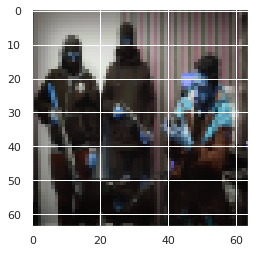

In [ ]:
plt.imshow(images[5])

In [ ]:
model = create_cnn(64, 64, 3, regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 100)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
print("[INFO] training model...")
model.fit(x=trainImagesX, y=trainY, validation_data=(testImagesX, testY), epochs=100, batch_size=8)

[INFO] training model...
Epoch 1/100
77/77 [==============================] - 5s 55ms/step - loss: 2897468.7500 - val_loss: 5092246.0000
Epoch 2/100
77/77 [==============================] - 4s 51ms/step - loss: 1017068.6250 - val_loss: 8137957.5000
Epoch 3/100
77/77 [==============================] - 4s 51ms/step - loss: 1272101.3750 - val_loss: 4927521.5000
Epoch 4/100
77/77 [==============================] - 4s 53ms/step - loss: 61624.1914 - val_loss: 3572974.5000
Epoch 5/100
77/77 [==============================] - 4s 51ms/step - loss: 44608.9961 - val_loss: 72800.4531
Epoch 6/100
77/77 [==============================] - 4s 50ms/step - loss: 35756.4297 - val_loss: 402894.9375
Epoch 7/100
77/77 [==============================] - 4s 51ms/step - loss: 20023.3027 - val_loss: 71452.1641
Epoch 8/100
77/77 [==============================] - 4s 51ms/step - loss: 1269695.2500 - val_loss: 3506290.7500
Epoch 9/100
77/77 [==============================] - 4s 50ms/step - loss: 403817.9062 - val_

KeyboardInterrupt: ignored

In [ ]:
X2=df_use.drop(['filename'], axis=1)
# # X2=X2.drop(['Unnamed: 0'], axis=1)

In [ ]:
#  X2=df
X2

,numberFollowers,numberPosts,numberFollowing,numberLikes,avgPrevious10Likes,stdPrevious10Likes,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly
0,720979,988,233,11227,19881.545455,8586.574056,13742.00,5156.535691,5.526025
1,720979,988,233,10047,17773.272727,7503.863008,12386.75,5161.117838,5.666397
2,720979,988,233,16781,19516.090909,9014.520102,13455.00,5818.683958,5.333079
3,792886,938,466,9132,8919.545455,3214.840665,5660.75,3003.871557,2.233995
4,792886,938,466,6000,9201.545455,2948.003884,5195.75,1941.644750,2.113168
...,...,...,...,...,...,...,...,...,...
1575,171865,1041,868,3258,2751.272727,749.727091,2642.25,1080.034722,5.894427
1576,227691,1481,402,4151,6430.090909,3248.541226,3297.50,1938.017630,9.153142
1577,227691,1481,402,2187,7124.272727,2679.747876,5486.50,2413.491316,8.749271
1578,227691,1481,402,5195,6742.181818,3209.172382,3508.50,2160.358998,8.614722


In [ ]:
print("Splitting the data into train test:")#90-10 split
split = train_test_split(X2, images, test_size=0.1, random_state=42)
(trainX, testX, trainImgX, testImgX) = split

maxPricetrain = trainX["numberLikes"].max()
trainY = trainX["numberLikes"] / maxPricetrain
maxPricetest = testX["numberLikes"].max()
testY = testX["numberLikes"] / maxPricetest

print("Splitting the train data into train val:")
split2 = train_test_split(trainX, trainImgX, test_size=0.11, random_state=42)
(trainX, valX, trainImgX, valImgX) = split2

maxPricetrain = trainX["numberLikes"].max()
trainY = trainX["numberLikes"] / maxPricetrain
maxPriceval = valX["numberLikes"].max()
valY = valX["numberLikes"] / maxPriceval

Splitting the data into train test:
Splitting the train data into train val:


In [ ]:
trainX=trainX.drop(['numberLikes'],axis=1)
valX=valX.drop(['numberLikes'],axis=1)
testX=testX.drop(['numberLikes'],axis=1)

In [ ]:
#normalisation of the meta data
#performing min-max scaling each continuous feature column to
# # the range [0, 1]
from sklearn import preprocessing
X = trainX.values
min_max_scaler = preprocessing.MinMaxScaler()
x_normalised = min_max_scaler.fit_transform(X)
trainX = pd.DataFrame(x_normalised)

X = valX.values
min_max_scaler = preprocessing.MinMaxScaler()
x_normalised = min_max_scaler.fit_transform(X)
valX = pd.DataFrame(x_normalised)

X = testX.values
min_max_scaler = preprocessing.MinMaxScaler()
x_normalised = min_max_scaler.fit_transform(X)
testX = pd.DataFrame(x_normalised)

In [ ]:
def create_mlp(dim):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
	model.add(Dense(1, activation="linear")) # final single regression layer
	return model

In [ ]:
def create_cnn(width, height, depth, filters=(16, 32, 64)):
	inputShape = (height, width, depth)
	inputs = Input(shape=inputShape)
	for (i, f) in enumerate(filters):
		if i == 0:
			x = inputs
		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=-1)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)
	x = Dense(4)(x)
	x = Activation("relu")(x)
	x = Dense(1, activation="linear")(x)
	model = Model(inputs, x)
	return model

In [ ]:
from tensorflow.keras.layers import concatenate
# create the MLP and CNN models
mlp = create_mlp(trainX.shape[1])
cnn = create_cnn(64, 64, 3)
combInput = concatenate([mlp.output, cnn.output])
x = Dense(4, activation="relu")(combInput)
x = Dense(1, activation="linear")(x)
model = Model(inputs=[mlp.input, cnn.input], outputs=x)

In [ ]:
opt = Adam(lr=1e-3, decay=1e-3 / 250)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
history=model.fit(
	x=[trainX, trainImgX], y=trainY,
	validation_data=([valX, valImgX], valY),
	epochs=200, batch_size=16)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/200
80/80 [==============================] - 15s 139ms/step - loss: 25873.3066 - val_loss: 321961.2500
Epoch 2/200
80/80 [==============================] - 8s 95ms/step - loss: 1729.9438 - val_loss: 92879.1719
Epoch 3/200
80/80 [==============================] - 8s 96ms/step - loss: 2492.4744 - val_loss: 312041.7188
Epoch 4/200
80/80 [==============================] - 8s 97ms/step - loss: 17221.2070 - val_loss: 77049.7734
Epoch 5/200
80/80 [==============================] - 8s 96ms/step - loss: 2598.3274 - val_loss: 7102.4106
Epoch 6/200
80/80 [==============================] - 8s 96ms/step - loss: 2887.3872 - val_loss: 13368.5830
Epoch 7/200
80/80 [==============================] - 8s 96ms/step - loss: 11244.3594 - val_loss: 97581.6797
Epoch 8/200
80/80 [==============================] - 8s 96ms/step - loss: 12071.3076 - val_loss: 40973.2930
Epoch 9/200
80/80 [==============================] - 8s 95ms/step - loss: 11830.2051 - val_loss: 95116.1562
Epoc

In [ ]:
model.save_weights("model.h5")

In [ ]:
# Predicting on the test set
testY=np.array(testY)
preds_test = model.predict([testX, testImgX])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(testY,preds_test)**(1/2))
print(r2_score(testY,preds_test))
print(mean_absolute_percentage_error(testY,preds_test))

0.11288163853141181
-0.0518026936656113
1.6438590729947045


In [ ]:
trainY=np.array(trainY)
preds_train = model.predict([trainX, trainImgX])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(trainY,preds_train)**(1/2))
print(r2_score(trainY,preds_train))
print(mean_absolute_percentage_error(preds_train,trainY))

0.06717958581575549
-0.012248287902324906
1.921283398489003


In [ ]:
import matplotlib.pyplot as plt
import numpy
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [ ]:
a=history.history['loss']
b=history.history['val_loss']
print(type(b))

<class 'list'>


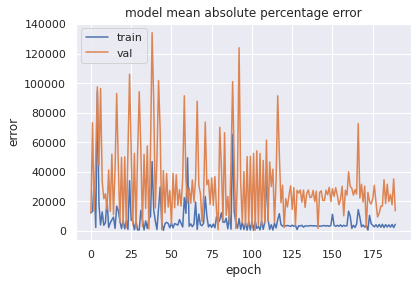

In [ ]:
plt.plot(a)
plt.plot(b)
plt.title('model mean absolute percentage error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

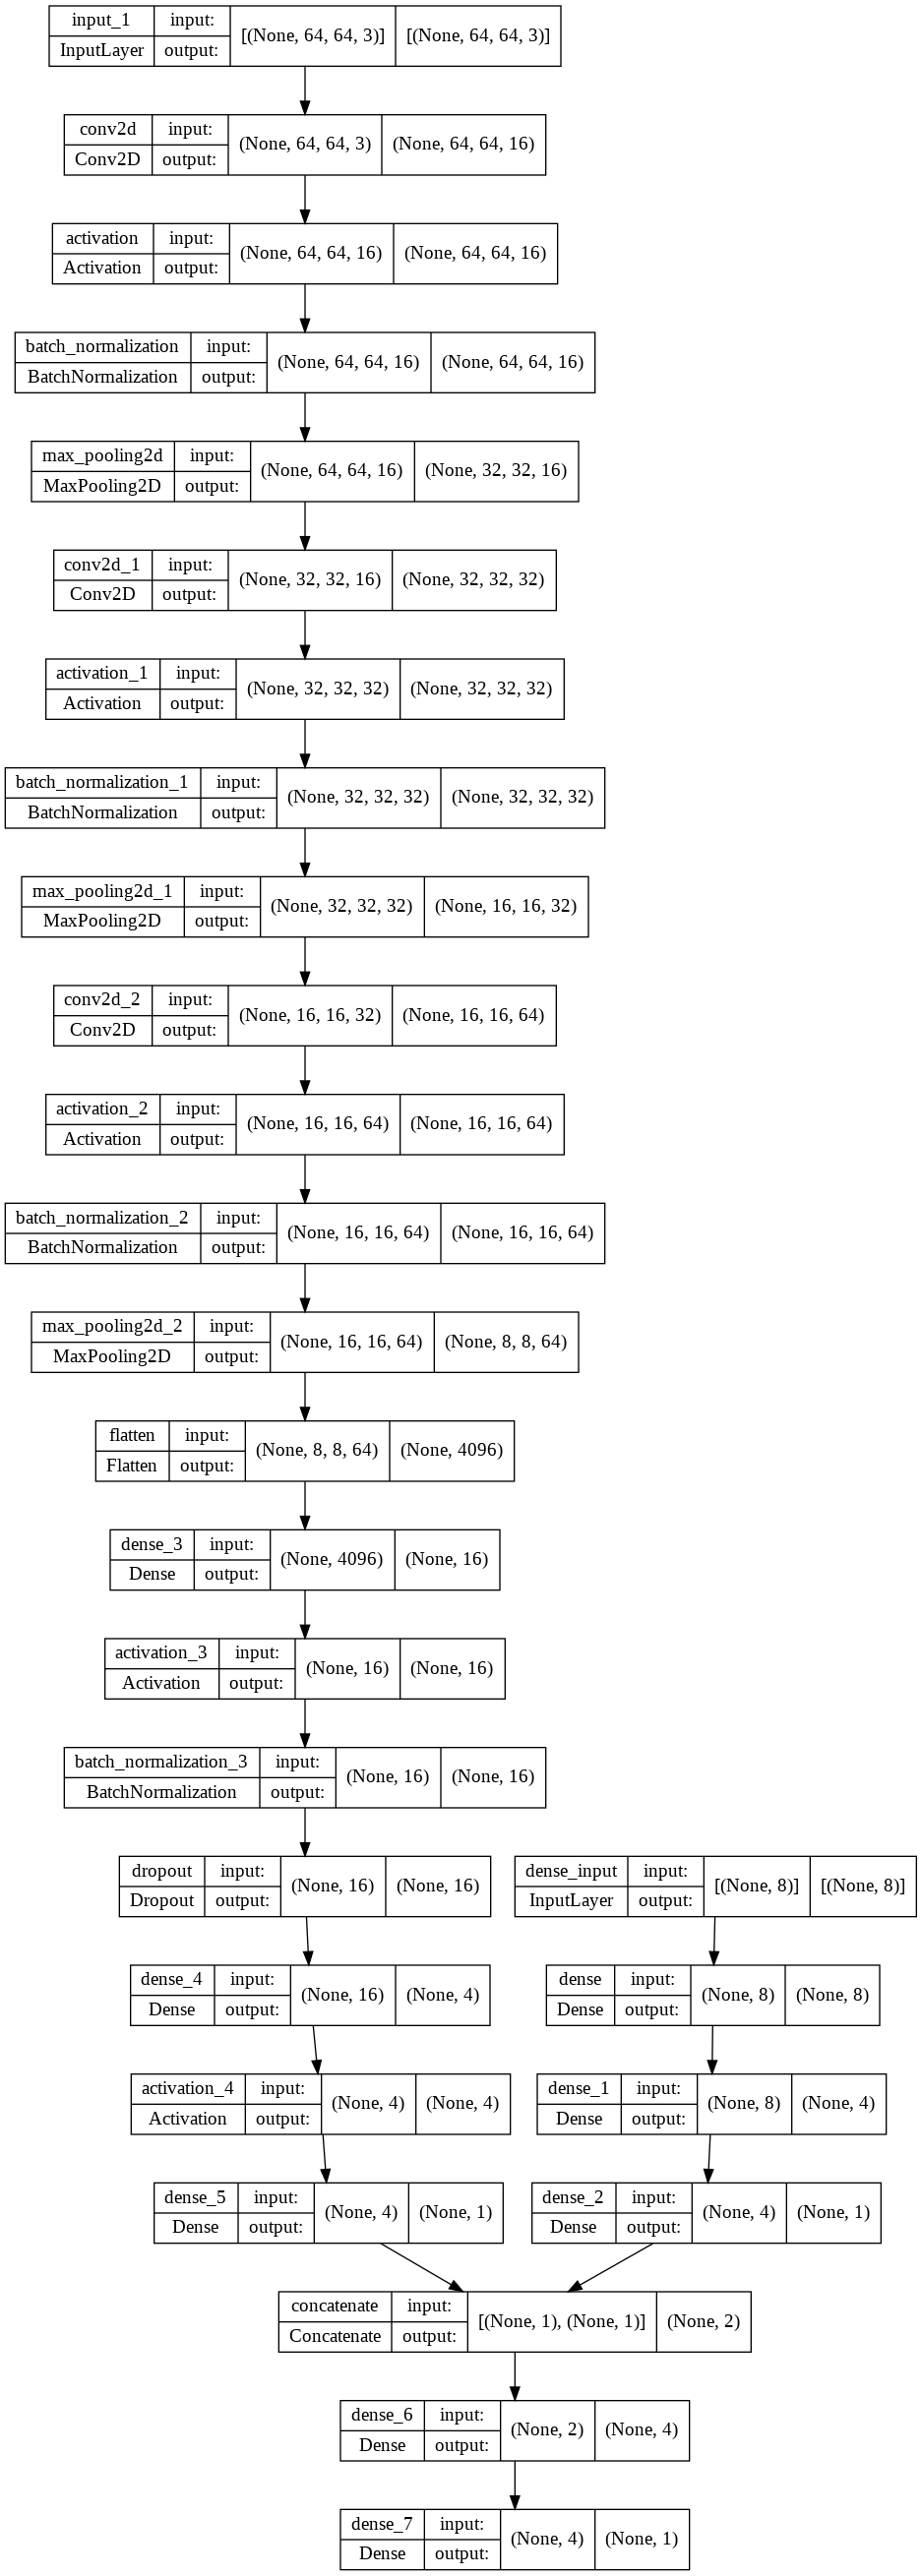

In [ ]:
import tensorflow as tf
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
errors = []
for i in range(len(preds_test)):
  if np.absolute((preds_test[i]-testY[i])/(testY[i]))>2.4:
    errors.append(i)

errors

[10,
 14,
 18,
 20,
 26,
 29,
 38,
 48,
 49,
 59,
 70,
 81,
 89,
 99,
 100,
 103,
 111,
 114,
 117,
 123,
 124,
 147,
 156]

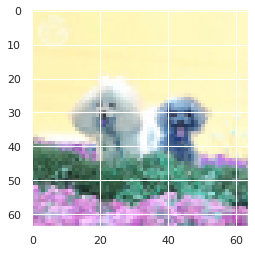

In [ ]:
# for i in errors:
plt.imshow(testImgX[123])

In [ ]:
testX

,0,1,2,3,4,5,6,7
0,0.195012,0.021107,0.067093,0.161505,0.315550,0.169735,0.319299,0.067836
1,0.095385,0.058270,0.092167,0.056396,0.068641,0.054684,0.051940,0.034610
2,0.005760,0.065536,0.088190,0.008208,0.008475,0.005824,0.002292,0.027726
3,0.018404,0.189269,0.059485,0.005371,0.010596,0.004295,0.022300,0.163522
4,0.097251,0.088677,0.061906,0.066736,0.103695,0.079419,0.067295,0.046304
...,...,...,...,...,...,...,...,...
153,0.084742,0.016820,0.136780,0.139202,0.472848,0.120718,0.221258,0.000867
154,0.008528,0.197697,0.085250,0.007679,0.008384,0.007268,0.003746,0.131158
155,0.050718,0.005013,0.019886,0.024207,0.028467,0.017719,0.010248,0.066989
156,0.001752,0.089585,0.084039,0.001349,0.001110,0.001047,0.003506,0.044739


In [ ]:
wrongs=[]
for i in errors:
  wrongs.append(testX.iloc[i,:])

wrongs

[0    0.000000
 1    0.051404
 2    0.276154
 3    0.001669
 4    0.000638
 5    0.001298
 6    0.000771
 7    0.023082
 Name: 10, dtype: float64, 0    0.037568
 1    0.133578
 2    0.005188
 3    0.004312
 4    0.005710
 5    0.003543
 6    0.007337
 7    0.232458
 Name: 14, dtype: float64, 0    0.001816
 1    0.058234
 2    0.056372
 3    0.002419
 4    0.002140
 5    0.001738
 6    0.004002
 7    0.069946
 Name: 18, dtype: float64, 0    0.003605
 1    0.028590
 2    0.034757
 3    0.002723
 4    0.007372
 5    0.001194
 6    0.004555
 7    0.006022
 Name: 20, dtype: float64, 0    0.012019
 1    0.037381
 2    0.075220
 3    0.003425
 4    0.003465
 5    0.002470
 6    0.004193
 7    0.043911
 Name: 26, dtype: float64, 0    0.002842
 1    0.178588
 2    0.281342
 3    0.001682
 4    0.002918
 5    0.001312
 6    0.004673
 7    0.197008
 Name: 29, dtype: float64, 0    0.001580
 1    0.021615
 2    0.076258
 3    0.003712
 4    0.002835
 5    0.003274
 6    0.001420
 7    0.031089
 Nam

In [ ]:
wrongs_df=pd.DataFrame(wrongs)

In [ ]:
wrongs_df.columns=['numberFollowers','numberPosts','numberFollowing','avgPrevious10Likes','stdPrevious10Likes','avgPrevious3Likes','stdPrevious3Likes','avgPostsWeekly']

In [ ]:
wrongs_df

,numberFollowers,numberPosts,numberFollowing,avgPrevious10Likes,stdPrevious10Likes,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly
10,0.000000,0.051404,0.276154,0.001669,0.000638,0.001298,0.000771,0.023082
14,0.037568,0.133578,0.005188,0.004312,0.005710,0.003543,0.007337,0.232458
18,0.001816,0.058234,0.056372,0.002419,0.002140,0.001738,0.004002,0.069946
20,0.003605,0.028590,0.034757,0.002723,0.007372,0.001194,0.004555,0.006022
26,0.012019,0.037381,0.075220,0.003425,0.003465,0.002470,0.004193,0.043911
29,0.002842,0.178588,0.281342,0.001682,0.002918,0.001312,0.004673,0.197008
38,0.001580,0.021615,0.076258,0.003712,0.002835,0.003274,0.001420,0.031089
48,0.003242,0.080793,0.035795,0.001632,0.003608,0.000857,0.003165,0.163522
49,0.001937,0.055110,0.104098,0.000000,0.000000,0.000000,0.000442,0.028476
59,0.007023,0.057071,0.164966,0.000787,0.002370,0.000467,0.002884,0.031526


In [ ]:
wrongs_Y=[]
for i in errors:
  wrongs_Y.append(testY[i])

wrongs_Y

[0.002709550648947722,
 0.003343847492976197,
 0.0038281882896392437,
 0.003324887532964476,
 0.0037799265732457728,
 0.0025165037833738387,
 0.0036989158350138754,
 0.002469965699708706,
 0.0005584570039815916,
 0.0020011375976007034,
 0.00043607908026957617,
 0.0018080907320268196,
 0.0018787596738886877,
 0.002974990089111812,
 0.0028819139217815468,
 0.0006480859058551804,
 0.0008049364841339607,
 0.0030611717255287245,
 0.0032456004274609165,
 0.0020821483358326007,
 0.001944257717565541,
 0.002926728372718341,
 0.0020166502921557476]

In [ ]:
wrongs_df['numberLikes']=wrongs_Y

In [ ]:
testXdf=pd.DataFrame(testX)

In [ ]:
testXdf

,0,1,2,3,4,5,6,7
0,0.195012,0.021107,0.067093,0.161505,0.315550,0.169735,0.319299,0.067836
1,0.095385,0.058270,0.092167,0.056396,0.068641,0.054684,0.051940,0.034610
2,0.005760,0.065536,0.088190,0.008208,0.008475,0.005824,0.002292,0.027726
3,0.018404,0.189269,0.059485,0.005371,0.010596,0.004295,0.022300,0.163522
4,0.097251,0.088677,0.061906,0.066736,0.103695,0.079419,0.067295,0.046304
...,...,...,...,...,...,...,...,...
153,0.084742,0.016820,0.136780,0.139202,0.472848,0.120718,0.221258,0.000867
154,0.008528,0.197697,0.085250,0.007679,0.008384,0.007268,0.003746,0.131158
155,0.050718,0.005013,0.019886,0.024207,0.028467,0.017719,0.010248,0.066989
156,0.001752,0.089585,0.084039,0.001349,0.001110,0.001047,0.003506,0.044739


Text(0, 0.5, 'numberLikes')

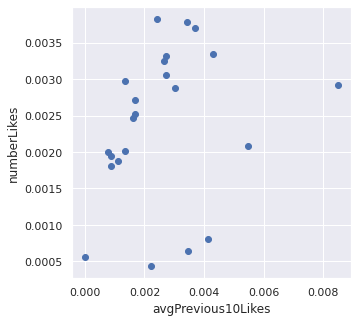

In [ ]:
#scatter plots
plt.figure(figsize=(5,5))
plt.scatter(x='avgPrevious10Likes', y='numberLikes',data=wrongs_df)
plt.xlabel('avgPrevious10Likes')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

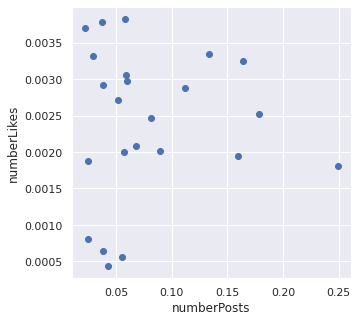

In [ ]:
#scatter plots
plt.figure(figsize=(5,5))
plt.scatter(x='numberPosts', y='numberLikes',data=wrongs_df)
plt.xlabel('numberPosts')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

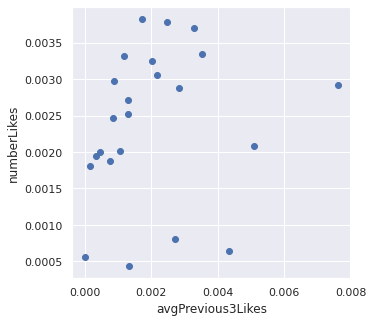

In [ ]:
#scatter plots
plt.figure(figsize=(5,5))
plt.scatter(x='avgPrevious3Likes', y='numberLikes',data=wrongs_df)
plt.xlabel('avgPrevious3Likes')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

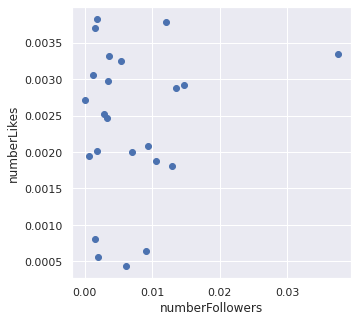

In [ ]:
#scatter plots
plt.figure(figsize=(5,5))
plt.scatter(x='numberFollowers', y='numberLikes',data=wrongs_df)
plt.xlabel('numberFollowers')
plt.ylabel('numberLikes')

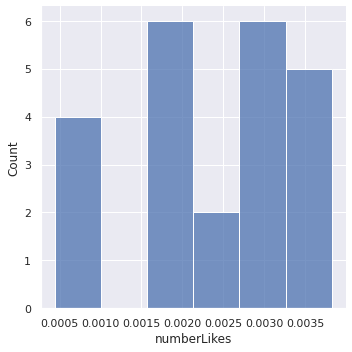

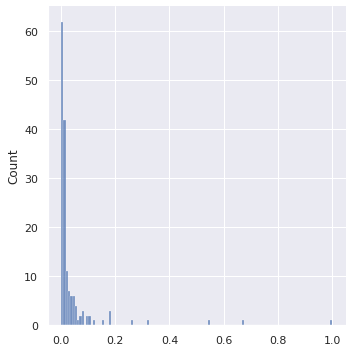

In [ ]:
sns.displot(wrongs_df, x="numberLikes")
sns.displot(testY)

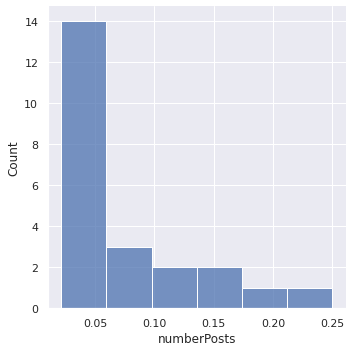

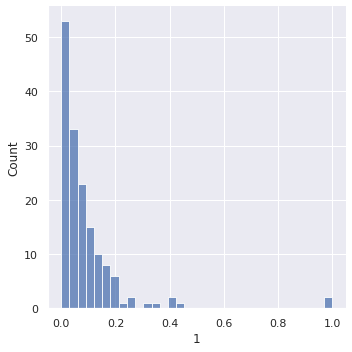

In [ ]:
sns.displot(wrongs_df, x="numberPosts")
sns.displot(testXdf, x=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


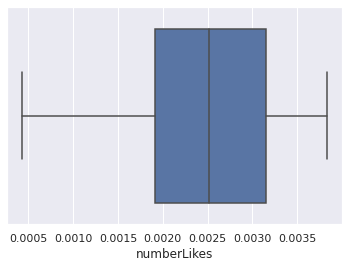

In [ ]:
# plt.figure(figsize=(20,15))
sns.boxplot(wrongs_df['numberLikes'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


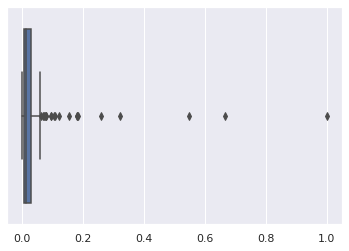

In [ ]:
sns.boxplot(testY)

In [ ]:
import seaborn as sns

<class 'numpy.ndarray'>


TypeError: ignored

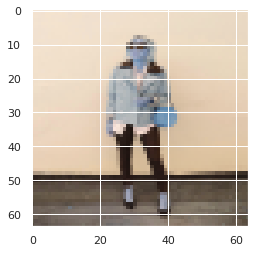

In [ ]:
from PIL import Image

for i in errors:
  img=testImgX[i]
  # print(type(img))
  plt.imshow(img)
  im = Image.fromarray(img)
  im.save("wrong"+"i+1"+".jpeg")

In [ ]:
import matplotlib

for i in errors:
  img=testImgX[i]
  print(i)
  # print(type(img))
  # plt.imshow(img)
  # im = Image.fromarray(img)
  # im.save("wrong"+"i+1"+".jpeg")
  name='wrong'+str(i+1)+".png"
  matplotlib.image.imsave(name, img)

10
14
18
20
26
29
38
48
49
59
70
81
89
99
100
103
111
114
117
123
124
147
156


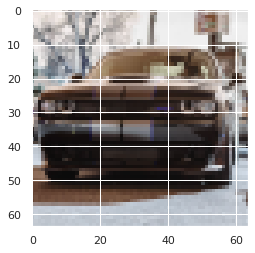

In [ ]:
plt.imshow(testImgX[100])